## DUE DATE: Thursday, July 19, 2018

# Neural Network

# Neural Network using Scikit-Learn 

## 1. Import the Libraries:
1. numpy
2. matplotlib.pyplot
3. pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

## 2. Import the digit data set

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()


## 3. Show some description about the data

In [3]:
print("Data Size" , digits.data.shape)
print("Number of Labels (1797,):", digits.target.shape)


Data Size (1797, 64)
Number of Labels (1797,): (1797,)


## 4. Displaying the First 20 Images in the dataset

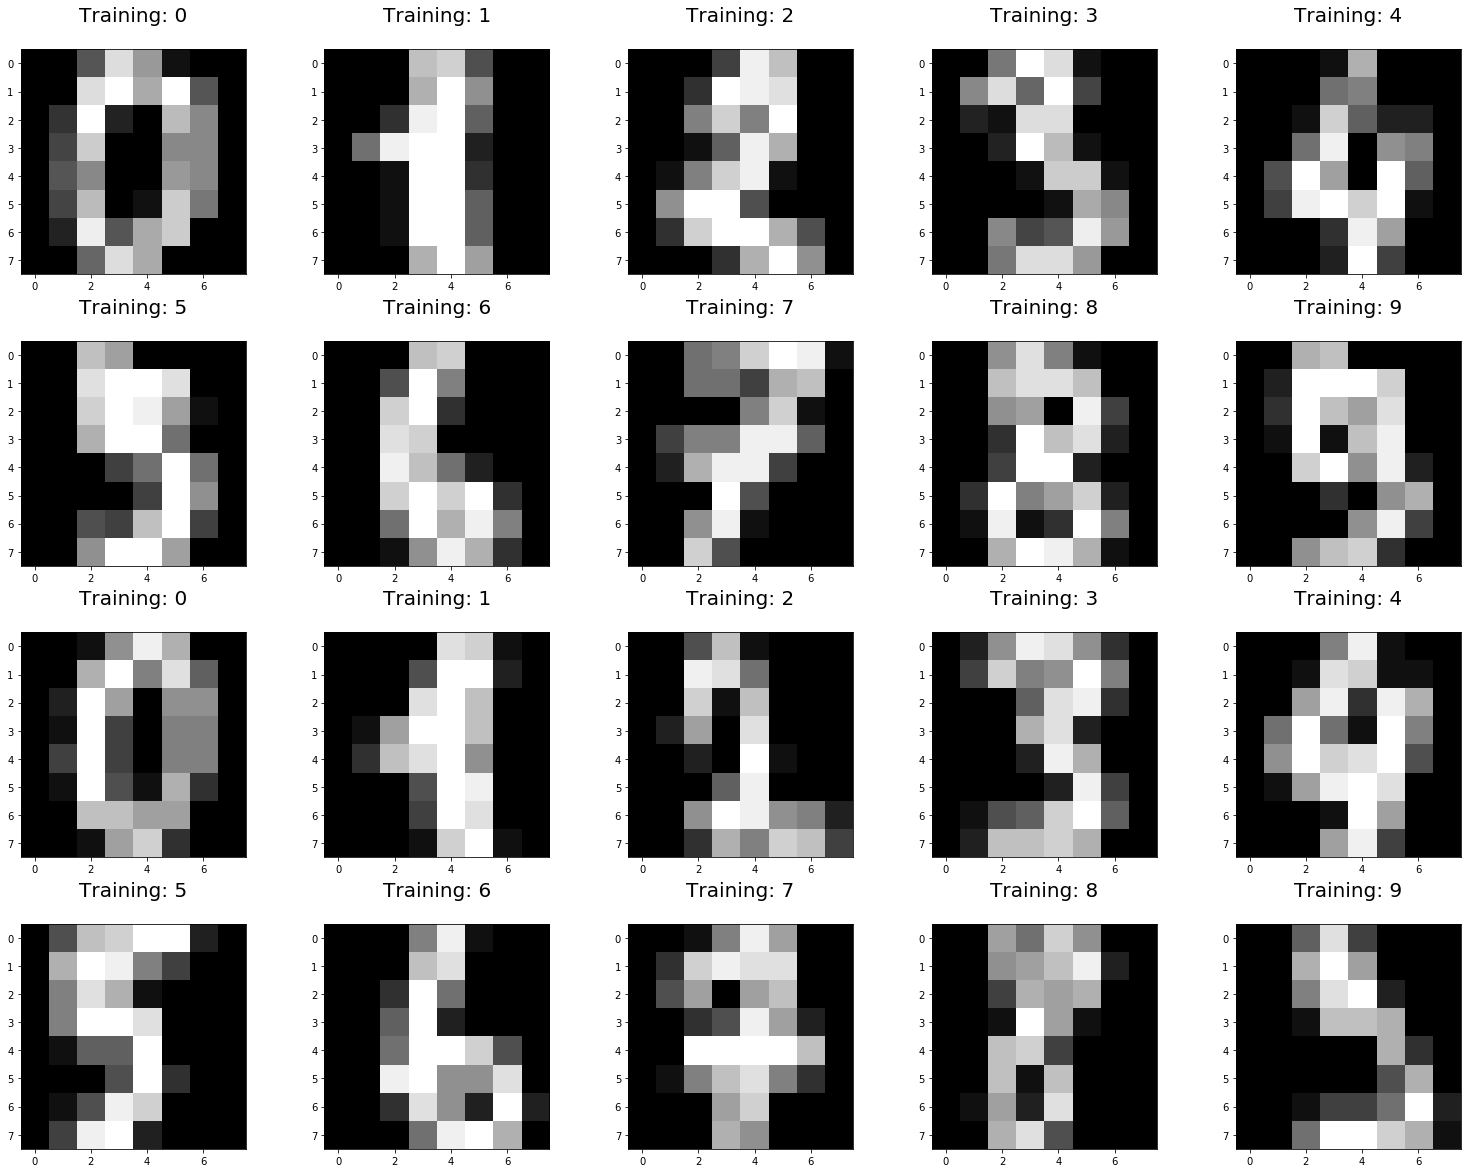

In [4]:
fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.35)
for index, (image, label) in enumerate(zip(digits.data[0:20], digits.target[0:20])):
    plt.subplot(4, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
plt.show()


## 5. Split the data into training and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=99)


## 6. Using the Perceptron Class of Scikit-Learn and create the model

In [6]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score 

ppn = Perceptron(eta0 = 0.001)
ppn.fit(X_train, y_train)  

/Users/Jose/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=0.001, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

## 7.  Test the model obtained from using the Perceptron Class of Scikit-Learn 

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  
predictions = ppn.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print("confusion matrix: \n",cm)  
score = accuracy_score(y_test, predictions)
print("===========================================")
print("score: ",score)
print("===========================================")
print("classification report: \n",classification_report(y_test, predictions)) 

confusion matrix: 
 [[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  2  1  0  0  0  0  0  0]
 [ 0  0 42  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  1]
 [ 0  1  0  0 26  0  0  1  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  1  0  0  0 40  0  0  0]
 [ 0  0  0  0  1  0  0 44  0  0]
 [ 0  1  2  1  0  0  1  0 27  0]
 [ 0  1  0  0  0  0  0  0  0 29]]
score:  0.961111111111
classification report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00        38
          1       0.90      0.90      0.90        29
          2       0.89      1.00      0.94        42
          3       0.95      0.97      0.96        40
          4       0.96      0.93      0.95        28
          5       1.00      1.00      1.00        35
          6       0.98      0.98      0.98        41
          7       0.98      0.98      0.98        45
          8       1.00      0.84      0.92        32
          9       0.97      0.97      0.97        30

avg / total     

# Our implementation of Neural Network

## 1.  Define all activation functions and thier derivatives 

#### sigmoid function:

In [8]:
def sigmoid(x):
    return 1/(1+(np.exp(-x)))

#### derivative of sigmoid function:

In [9]:
def sigmoid_d(x):
    return sigmoid(x) * (1 - sigmoid(x))

#### Tanh function:

In [10]:
def Tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

#### derivative of Tanh function:

In [11]:
def Tanh_d(x):
    return 1-(Tanh(x)*Tanh(x))

#### ReLU function:

In [12]:
def ReLU(x):
    return max(0,x)

#### derivative of ReLU function:

In [13]:
def ReLU_d(x):
    if x < 0:
        y=0
    else:
        y=1
    return y

#### Leaky ReLU function:

In [14]:
def L_ReLU(x):
    return max(0.01*x,x)

#### derivative of Leaky ReLU function:

In [15]:
def L_ReLU_d(x):
    if x < 0:
        y=0.01
    else:
        y=1
    return y

#### cost function:

In [16]:
def cost(y,A2):
    return  -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))


#### the neural network function:

In [17]:
def Propagation(X, y, n_h, n_y, alpha, iterations,g1,g2,g1_prime):
    epoch = int(iterations//20)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        if i%epoch == 0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
    return W1, b1, W2, b2, cost_list

#### the neural network function (alpha decy and momentum): 

In [18]:
def Propagation2(X, y, n_h, n_y, alpha, iterations,g1,g2,g1_prime):
    epoch = int(iterations//20)
    epoch_a = int(iterations//200)
    cost_list = [[],[]]
    m = X.shape[1]
    n_x = X.shape[0]
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    # momentum
    beta=0.5
    mmt_W1=np.zeros(W1.shape)
    mmt_W2=np.zeros(W2.shape)
    mmt_b1=np.zeros(b1.shape)
    mmt_b2=np.zeros(b2.shape)
    
    for i in range(iterations):
        Z1 = np.dot(W1, X) + b1
        A1 = g1(Z1)
        Z2 = np.dot(W2, A1) + b2
        A2 = g2(Z2)
        if i%epoch_a == 0:
            alpha=alpha*0.9
        if i%epoch == 0:
            cost = -np.sum(y*np.log(A2) + (1-y)*np.log(1-A2))
            cost_list[0].append(i)
            cost_list[1].append(cost)
        dZ2 = A2 - y
        dW2 = (1/m) * np.dot(dZ2, A1.T)
        db2 = (1/m) * np.sum(dZ2)
        dZ1 = np.dot(W2.T, dZ2) * g1_prime(Z1)
        dW1 = (1/m) * np.dot(dZ1, X.T)
        db1 = (1/m) * np.sum(dZ1)
        W2 = W2 - alpha * dW2
        b2 = b2 - alpha * db2
        W1 = W1 - alpha * dW1
        b1 = b1 - alpha * db1
    return W1, b1, W2, b2, cost_list

#### Foreword Propagation function (and do the prediction):

In [19]:
def forewordPropagation(X, W1, W2, b1, b2, g1,g2):
    Z1 = np.dot(W1, X) + b1
    A1 = g1(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = g2(Z2)
    #do the prediction and return the output
    return np.argmax(A2,0)

#### reshaping the y_train data:

In [20]:
Y=np.zeros((y_train.shape[0], 10))
for i in range(y_train.shape[0]):
    Y[i,y_train[i]]=1

In [21]:
print(Y)
print(X_train.shape)

[[ 0.  0.  0. ...,  0.  0.  1.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]
 ..., 
 [ 0.  0.  0. ...,  1.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  1.]]
(1437, 64)


In [25]:
n_h = 100; n_y = 10
alpha = 0.01
iterations = 10000
W1, b1, W2, b2, cost_list = Propagation(X_train.T, Y.T, n_h, n_y, alpha, iterations,sigmoid,sigmoid,sigmoid_d)

print('W1=',W1, '\n', 'b1=',b1, '\n', 'W2=',W2, '\n', 'b2=',b2)
plt.plot(cost_list[0], cost_list[1], 'go')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

#### predict then test the model:

In [23]:
prediction = forewordPropagation(X_test.T, W1, W2, b1, b2, sigmoid,sigmoid)
print(confusion_matrix(y_test,prediction))  
print(classification_report(y_test,prediction)) 


[[38  0  0  0  0  0  0  0  0  0]
 [ 0 26  1  0  0  0  0  0  2  0]
 [ 0  2 37  2  0  0  0  0  1  0]
 [ 0  0  1 36  0  0  0  1  2  0]
 [ 0  0  1  0 24  0  1  1  1  0]
 [ 0  2  0  0  1 31  0  0  1  0]
 [ 0  1  0  0  0  0 40  0  0  0]
 [ 1  1  0  0  2  0  0 40  0  1]
 [ 1  0  1  0  0  1  1  0 28  0]
 [ 0  0  0  2  0  1  0  1  3 23]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.97        38
          1       0.81      0.90      0.85        29
          2       0.90      0.88      0.89        42
          3       0.90      0.90      0.90        40
          4       0.89      0.86      0.87        28
          5       0.94      0.89      0.91        35
          6       0.95      0.98      0.96        41
          7       0.93      0.89      0.91        45
          8       0.74      0.88      0.80        32
          9       0.96      0.77      0.85        30

avg / total       0.90      0.90      0.90       360



In [24]:
print(prediction.shape)
print(y_test.shape)

(360,)
(360,)
